![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

![filo_genome](https://user-images.githubusercontent.com/22747792/73678324-02c3fe00-466d-11ea-90f9-73ea6e741877.png)

# Python for Genomics 
## Section 9: Final Project Part 2 - building an alignment features summary calculator

From the previous project, we know the names, lengths, and GC contents of all the genes contained with an Ebola Virus genome.

Now we want to determine the *most conserved gene* from past outbreaks. In this project we will be testing three genes:

* NP (nucleoprotein)
* GP (glycoprotein)
* L (RNA-directed RNA polymerase L)

I have already cleaned the sequences and aligned all of the genes from past outbreaks and placed them in the /gene_alignment_files/ folder.

Can you write a script that gives us all the information we need from these clustal files to determine the most conserved gene?


### Build a Clustal Omega Summary Calculator: 

#### The input for this calculator will be a clustal file containing a single alignment. 

#### The output will be a text/visual summary containing:

    1. Number of sequences aligned
    2. A consensus sequence
    3. How many conserved bases out of the total gene
    4. % similarity
    5. A plot showing hamming distances between sequences
    
---
#### Information on the past outbreak data:

The additional sequences are obtained from:
* AY354458.1 Zaire ebolavirus strain Zaire 1995, complete genome
* NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome
* NC_004161.1 Reston ebolavirus isolate Reston virus/M.fascicularis-tc/USA/1989/Philippines89-Pennsylvania, complete genome
* NC_006432.1 Sudan ebolavirus isolate Sudan virus/H.sapiens-tc/UGA/2000/Gulu-808892, complete genome
* NC_014372.1 Tai Forest ebolavirus isolate Tai Forest virus/H.sapiens-tc/CIV/1994/Pauleoula-CI, complete genome
* NC_014373.1 Bundibugyo ebolavirus, complete genome
* NC_039345.1 Bombali ebolavirus isolate Bombali ebolavirus/Mops condylurus/SLE/2016/PREDICT_SLAB000156, complete genome

The data I extracted is from Vipr's database here 

https://journals.plos.org/plospathogens/article/figure?id=10.1371/journal.ppat.1000212.t002

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Let's build this up, one item at a time. 

Then, we can put all the pieces together in one function.


#### Go ahead and run the cell below to import the libraries we will need to build this calculator.

In [26]:
from Bio import AlignIO
from Bio.Align import AlignInfo
from skbio import DNA, TabularMSA
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

Now we need to import the align file using the proper AlignIO function. Then, save the summary of that alignment to a variable.

In [2]:
# Your code here...

In [27]:
NP_align = AlignIO.read('data/gene_alignment_files/NP_alloutbreaks.clustal', 'clustal')
NP_alignsummary = AlignInfo.SummaryInfo(NP_align)

Now let's gather some information using that saved alignment summary. Use the len() to figure out the number of total sequences that were aligned.

In [4]:
# Your code here

In [28]:
len(NP_align)

9

Now calculate the dumb consensus.

In [6]:
# Your code here...

In [29]:
NP_alignsummary.dumb_consensus(threshold=0.5)

Seq('GAGGAAGATTAATAATTTTCCTCTCATTGAAATTTATATTGGAATTXAAATTGA...AAA', SingleLetterAlphabet())

For the conserved sequences, let's use some scikit bio. It's already imported up top, but we'll have to convert our clustal file to a fasta file before we can convert that to the tabular format that scikit bio uses.

In [8]:
# Your code here...

In [30]:
NP_fasta_aln = AlignIO.convert('data/gene_alignment_files/NP_alloutbreaks.clustal', 'clustal', 'data/NP_alloutbreaks.fasta', 'fasta')
NP_fasta_aln

1

Now use the TabularMSA.read() to save the tabbed file to a variable, and remember to change the id's for the table by using the reassign_index method.

In [10]:
# Your code here

In [31]:
#this creates a `TabularMSA` object using our newly converted fasta file, and specifying that it is DNA
NP_fasta_aln = TabularMSA.read('data/NP_alloutbreaks.fasta', format='fasta', constructor=DNA)

# reassigns the default ids (1 to n) to the fasta ID's instead of default 0,1,3 numbering
NP_fasta_aln.reassign_index(minter='id')
NP_fasta_aln

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 9
    position count: 3039
-----------------------------------------------------------------------
GAGGAAGATTAATAATTTTCCTCTCATTGAAAT ... TTTA--CACGATCATTTTATAATTAAGAAAAAA
GAGGAAGATTAATAATTTTCCTCTCATTGAAAT ... TTTA--CACGATCGTTTTATAATTAAGAAAAAA
...
GAGGAAGATTAATAATTTTCCTCTCATTGAAAT ... TTTA--CACGATCGTTTTATAATTAAGAAAAAA
GAGGAAGATTAATAATTTTCCTCTCATTGAAAT ... TTTA--CACGATCGTTTTATAATTAAGAAAAAA

Ok! Now it's time to use some methods that are specific to tabularMSA objects, such as calculating the conserved bases.

Go ahead and save the conservation calcuations to a variable. (Remember, this is going to be an array.)

In [12]:
# Your code here

In [32]:
NP_conserved = NP_fasta_aln.conservation(degenerate_mode='nan', gap_mode = "ignore")
NP_conserved

array([1., 1., 1., ..., 1., 1., 1.])

Calculate the total number of bases in that array.

In [ ]:
# Your code here...

In [33]:
NP_total_seqs = (len(NP_conserved))
NP_total_seqs

3039

Calculate the total number of postions in that array that are equal to 1. (Meaning total conservation.)

In [ ]:
# Your code here

In [34]:
NP_total_conserved = (NP_conserved == 1).sum()
NP_total_conserved

1026

Divide the total number in the array with the number that is conserved to get % conservation:

In [ ]:
# Your code here

In [35]:
(NP_total_conserved/NP_total_seqs)

0.3376110562685094

Create a distance matrix (or calculate the hamming distance).



In [ ]:
# Your code here

In [ ]:
# Your code here

In [36]:
dm = DistanceMatrix.from_iterable(NP_fasta_aln, metric=hamming, keys=NP_fasta_aln.index)
print(dm)


9x9 distance matrix
IDs:
'Zaire1995_AY354458.1', 'Zaire_002549_NC_002549.1', 'RestonRef_NC_004161.1', ...
Data:
[[0.         0.01382034 0.42481079 0.43073379 0.39058901 0.39157618
  0.41329385 0.03455084 0.03455084]
 [0.01382034 0.         0.42316551 0.43435341 0.39190523 0.39322145
  0.41428101 0.03257651 0.03257651]
 [0.42481079 0.42316551 0.         0.44784469 0.4396183  0.44093452
  0.45113524 0.42448174 0.42448174]
 [0.43073379 0.43435341 0.44784469 0.         0.44883185 0.44060546
  0.46528463 0.43172096 0.43172096]
 [0.39058901 0.39190523 0.4396183  0.44883185 0.         0.32214544
  0.41855874 0.39058901 0.39058901]
 [0.39157618 0.39322145 0.44093452 0.44060546 0.32214544 0.
  0.42678513 0.39058901 0.39058901]
 [0.41329385 0.41428101 0.45113524 0.46528463 0.41855874 0.42678513
  0.         0.4136229  0.4136229 ]
 [0.03455084 0.03257651 0.42448174 0.43172096 0.39058901 0.39058901
  0.4136229  0.         0.        ]
 [0.03455084 0.03257651 0.42448174 0.43172096 0.39058901 0.39058

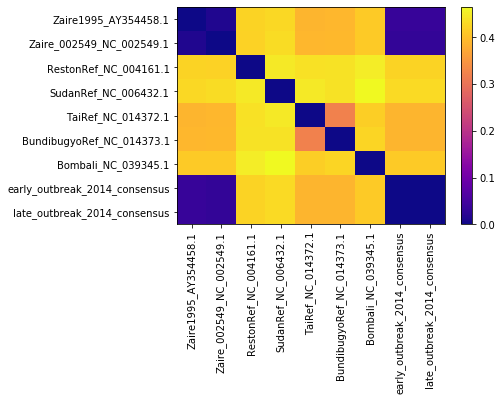

In [20]:
plot = dm.plot(cmap = 'plasma')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Putting it all together in one script/Testing NP or GP

Ok, this is where you can get creative and more efficient. Instead of running all the cells individually, combine these calculations into a single function, or multiple functions within a single cell. 

Then, when you're done, run three clustal files in the gene_alignment_files folder:

* GP_alloutbreaks.clustal
* NP_alloutbreaks.clustal
* L_alloutbreaks.clustal

#### If we were looking to design a test for the most conserved gene, which one would we choose?

In bioinformatics, it is common to pipe data from one computation into another to streamline workflows. 

You can do this many ways, and the correct way to do it is not the shortest, nor the fastest, nor the one using the newest software/libraries. (Although that certainly helps later on.)

#### The best one is the one that makes sense to YOU.



In [44]:
# Test GP_alloutbreaks.clustal here

from Bio import AlignIO
from Bio.Align import AlignInfo
from skbio import DNA, TabularMSA
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

def align_summary(clustal_file):
    pass
    
def conservation(fasta_aln):
    pass

In [43]:
# Test NP_alloutbreaks.clustal here

In [42]:
# Test L_alloutbreaks.clustal here

#### Here is mine, and it may look very different from yours, and that's ok 😃 GREAT JOB!

Clustal Omega Summary Stat Calculator
*************************************

The total number of sequences aligned: 7
The consensus sequence is 
GATGAAGATTAAGCCGACXXXGAGCGXAATCTTCATCTCTTTXAXATXATTTXTXXXTXAXGXTAXAGATXCTXAGATTGTTCTXAXCXXXCCXXXXATXAXAATXAACTTXXCXATAAGTCXXCAXAXTXXXXCAXXXACAXAATGGGXGXXXCAGGAATXCTXCAATTGCCXCGTGAXCGXTTCAGGAAAACATCXTTCTTTGTTTGGGTAATXATCCTXTTCCAAAGAGCXTTTTCCATCCCXCTXGGXGTXGTXCACAACAGCACTCTACAGGTXAGTGATATTGACAAATTXGTXTGCCGXGACAAACTXTCATCXACAAATCAGCTGAAATCAGTTGGGCTGAATCTXGAAGGXAATGGAGTXGCAACTGATGTXCCATCXGCAACXAAAAGATGGGGXTTCCGXTCTGGTGTXCCACCAAAGGTGGTCAAXTATGAAGCTGGAGAATGGGCTGAAAACTGCTACAATCTXGAXATCAAGAAACCTGACGGGAGTGAGTGCCTACCXGXAGCXCCAGAXGGXGTXCGXGGCTTCCCXCGXTGCCGXTATGTGCACAAAGTXTCAGGAACXGGXCCXTGTCCXGGAGACTTXGCCTTCCACAAAGAXGGXGCTTTCTTCCTGTATGATCGACTXGCXTCAACAGTCATCTACCGAGGAACXACTTTTGCTGAAGGTGTXGTTGCATTTXTGATXCTGCCXXAAGCTAAAAAGGAXTTCTTCCAGTCXCCXCCAXTXCAAGAGCCGGTCAATACXACXGAXGATCCXTCXAGTTACTACXACACXACCACAXTTAAXTATGAGGCTXCCAATTTTGGXACCAATXAXACAGAGTXTCTGTTCXAAGTXGAC

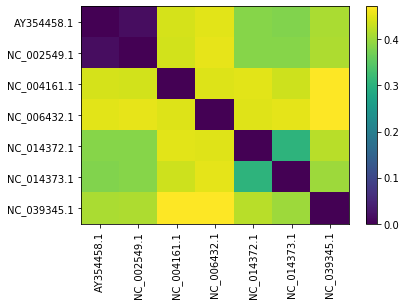

In [25]:
# Testing GP_alloutbreaks.clustal

from Bio import AlignIO
from Bio.Align import AlignInfo
from skbio import DNA, TabularMSA
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

#calculates the number of sequences and consensus
def align_summary(clustal_file):
    align_summary = AlignInfo.SummaryInfo(clustal_file)
    align_total = len(clustal_file)
    consensus = align_summary.dumb_consensus(threshold=0.5)
    return(align_total, consensus)

#calculates the percent conserved
def conservation(fasta_aln):
    fasta_aln.reassign_index(minter='id')
    conserved = fasta_aln.conservation(degenerate_mode='nan', gap_mode = "ignore")
    total_conserved = (conserved == 1).sum()
    percent_conserved = (total_conserved/(len(conserved)))
    return(percent_conserved)


# INPUT: enter in the files for the align summary here   
clustal_file = AlignIO.read('data/gene_alignment_files/GP_alloutbreaks.clustal', 'clustal')
align_total, consensus = align_summary(clustal_file)

# INPUT: enter in the input file and converted file for the percent conserved here
fasta_file = AlignIO.convert('data/gene_alignment_files/GP_alloutbreaks.clustal', 'clustal', 'data/GP_alloutbreaks.fasta', 'fasta')
fasta_aln = TabularMSA.read('data/GP_alloutbreaks.fasta', format='fasta', constructor=DNA)
percent_conserved = conservation(fasta_aln)

#calculates the hamming graph using the align fasta file above.
hamming_graph = DistanceMatrix.from_iterable(fasta_aln, metric=hamming, keys=fasta_aln.index)

#OUTPUT:
print("Clustal Omega Summary Stat Calculator")
print("*************************************" + "\n")
print("The total number of sequences aligned: " + str(align_total)) 
print("The consensus sequence is ")
print(consensus)
print("\n")
print("The percentage conserved for these sequences is " + str(percent_conserved))
print("\n")
print("The hamming distances for the sequences:")
hamming_graph

Clustal Omega Summary Stat Calculator
*************************************

The total number of sequences aligned: 9
The consensus sequence is 
GAGGAAGATTAATAATTTTCCTCTCATTGAAATTTATATTGGAATTXAAATTGAAATTGTTAXTGTAATXXXXXTATACCTGGTTTGTTXCXGAGCCAXATCACXAAGATAGAGAAXAACCTAGGTCXCXGXXGGGXGCAACAXGGCAGGCCXAGXGCXTCAGTGTGCCCAGTTGAAAATCCCTTTCXTXAACXTCTAGGXCTXATCACATCACAAGTTCXXCCTXAXXGATAACTCTGCAGXGTXATCCAACAAXCTXAXTXGXACCTACXXTATTXGTTAAAGGACAGCATTAGTTAXCCXXATTACAXTCAAACAAGCXAGAXTGAGAATTAACTTTGXTTTTGAACTTGAAXACXXAGAGGACTGXAXACTCAXCXACCCTAAAGCXTGGGGTAAAAXAXTTCXXAXATXGTTXAAAXACAAATTGCTXXGAATCACAAAAXXCCXAATATGGATXCTCGTCCTCAXAAAXTCTGGATGACGCXGAGTCXAXCTGAATCTGACATGGATTACCACAAGATCTTGACAGCAGGXCTGTCCGTTCAACAGGGGATTGTTCGGCAAAGAGTCATCCCAGTGTATCAAGTXAACAATCTTGAGGAAATTTGCCAACTTATCATACAGGCCTTTGAAGCXGGTGTTGATTTTCAAGAGAGTGCXGACAGTTTCCTTCTXATGCTTTGTCTXCATCATGCXTACCAAGGAGATTACAAACTXTTCTTGGAAAGTGGXGCAGTCAAGTATTTGGAAGGXCATGGGTTCCGTTTTGAAGTCAAGAAGAAGGAXGGAGTGAAGCGCCTXGAGGAATTGCTGCCXGCAGTATCXAGTGGAAAAAACATTAAGAGAACACTX

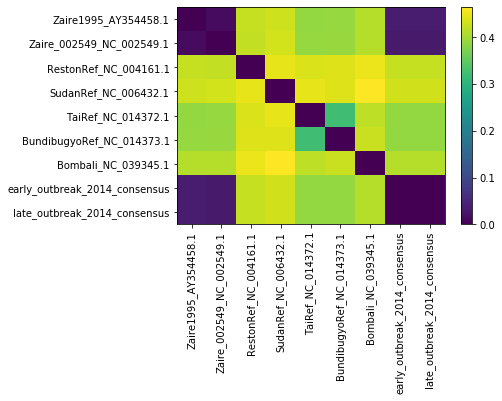

In [38]:
# Testing NP_alloutbreaks.clustal

from Bio import AlignIO
from Bio.Align import AlignInfo
from skbio import DNA, TabularMSA
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

#calculates the number of sequences and consensus
def align_summary(clustal_file):
    align_summary = AlignInfo.SummaryInfo(clustal_file)
    align_total = len(clustal_file)
    consensus = align_summary.dumb_consensus(threshold=0.5)
    return(align_total, consensus)

#calculates the percent conserved
def conservation(fasta_aln):
    fasta_aln.reassign_index(minter='id')
    conserved = fasta_aln.conservation(degenerate_mode='nan', gap_mode = "ignore")
    total_conserved = (conserved == 1).sum()
    percent_conserved = (total_conserved/(len(conserved)))
    return(percent_conserved)


# INPUT: enter in the files for the align summary here   
clustal_file = AlignIO.read('data/gene_alignment_files/NP_alloutbreaks.clustal', 'clustal')
align_total, consensus = align_summary(clustal_file)

# INPUT: enter in the input file and converted file for the percent conserved here
fasta_file = AlignIO.convert('data/gene_alignment_files/NP_alloutbreaks.clustal', 'clustal', 'data/NP_alloutbreaks.fasta', 'fasta')
fasta_aln = TabularMSA.read('data/NP_alloutbreaks.fasta', format='fasta', constructor=DNA)
percent_conserved = conservation(fasta_aln)

#calculates the hamming graph using the align fasta file above.
hamming_graph = DistanceMatrix.from_iterable(fasta_aln, metric=hamming, keys=fasta_aln.index)

#OUTPUT:
print("Clustal Omega Summary Stat Calculator")
print("*************************************" + "\n")
print("The total number of sequences aligned: " + str(align_total)) 
print("The consensus sequence is ")
print(consensus)
print("\n")
print("The percentage conserved for these sequences is " + str(percent_conserved))
print("\n")
print("The hamming distances for the sequences:")
hamming_graph

Clustal Omega Summary Stat Calculator
*************************************

The total number of sequences aligned: 9
The consensus sequence is 
GAGGAAGATTAAGAAAAACTGCTTATTGGGTCTTTCCGTGTTTTAGATGAAGCAGTTGACATTCTTCCTCTTGATATTAAATGGCTACACAACATACCCAATACCCAGACGCXAGGTTATCATCACCAATTGTXTTGGACCAATGTGACCTTGTCACTAGAGCTTGCGGGTTXTATTCATCATACTCCCTXAATCCXCAACTAAGXAACTGTAAACTXCCGAAACATATXTACCGXTTXAAATATGATGCAACTGTTACCAAGTTCTTAAGTGATGTACCAGTGGCXACATTGCCXATAGATTTCATAGTCCCAATTCTTCTXAAGGCACTATCAGGXAATGGXTTCTGTCCTGTTGAGCCGCGGTGCXAXCAXTTCTTAGATGAAATTATTAAXTACACXXTGCAAGATGCTCXCTTCCTXAAATATTATCTCAAXAATGTXGGTGCTCAAGAAGACTXTGTTGATGAXCAXTTTXAAGAXAAAATXXXAXCTTXAATTCAXGACAATGAATTTTTACATCAAATGTTTTTCTGGTATGATCTXGCTATTTTAACTCGAAGXGGXAGATTAAATCGAGGAAACXCTAGXTCAACXTGGTTTGTTCATGATGATTTAATAGACATCTTAGGXTATGGXGATTATATTTTTTGGAAGATCCCAATTTCAXTGTTACCACTGAACACACAAGGXATCCCXCATGCAGCTATGGACTGGTATCAXXCATCAGTATTCAAAGAAGCGGTTCAAGGGCATACACACATTGTTTCTGTTTCTACTGCCGATGTCTTXATAATGTGTAAAGATXTAATTACATGTCGATTCAATACAACTCTXATTGCAXAAATAGCAXAGX

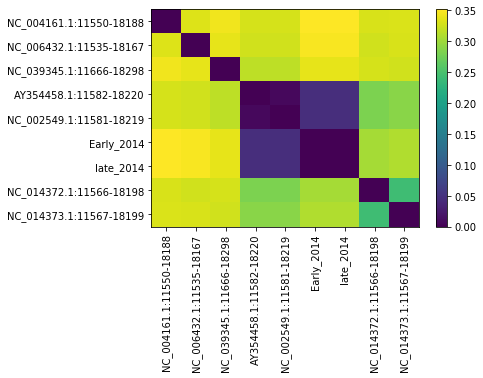

In [40]:
# Testing L_alloutbreaks.clustal

from Bio import AlignIO
from Bio.Align import AlignInfo
from skbio import DNA, TabularMSA
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

#calculates the number of sequences and consensus
def align_summary(clustal_file):
    align_summary = AlignInfo.SummaryInfo(clustal_file)
    align_total = len(clustal_file)
    consensus = align_summary.dumb_consensus(threshold=0.5)
    return(align_total, consensus)

#calculates the percent conserved
def conservation(fasta_aln):
    fasta_aln.reassign_index(minter='id')
    conserved = fasta_aln.conservation(degenerate_mode='nan', gap_mode = "ignore")
    total_conserved = (conserved == 1).sum()
    percent_conserved = (total_conserved/(len(conserved)))
    return(percent_conserved)


# INPUT: enter in the files for the align summary here   
clustal_file = AlignIO.read('data/gene_alignment_files/L_alloutbreaks.clustal', 'clustal')
align_total, consensus = align_summary(clustal_file)

# INPUT: enter in the input file and converted file for the percent conserved here
fasta_file = AlignIO.convert('data/gene_alignment_files/L_alloutbreaks.clustal', 'clustal', 'data/L_alloutbreaks.fasta', 'fasta')
fasta_aln = TabularMSA.read('data/L_alloutbreaks.fasta', format='fasta', constructor=DNA)
percent_conserved = conservation(fasta_aln)

#calculates the hamming graph using the align fasta file above.
hamming_graph = DistanceMatrix.from_iterable(fasta_aln, metric=hamming, keys=fasta_aln.index)

#OUTPUT:
print("Clustal Omega Summary Stat Calculator")
print("*************************************" + "\n")
print("The total number of sequences aligned: " + str(align_total)) 
print("The consensus sequence is ")
print(consensus)
print("\n")
print("The percentage conserved for these sequences is " + str(percent_conserved))
print("\n")
print("The hamming distances for the sequences:")
hamming_graph

At 46%, the L gene looks more conserved than GP or NP, so should be the starting point for investigating a potential target for our diagnostic that detects Ebola!

GREAT JOB! 😃